Favre Victor et Badiel Dane

In [23]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

(4375, 14)


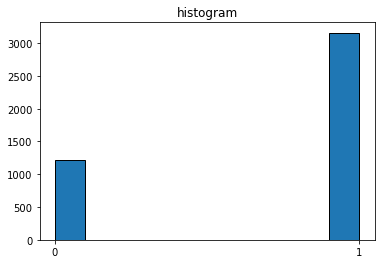

In [24]:
data = pd.read_csv("credit_scoring.csv",sep = ';')
data_ar = data.to_numpy()
print(np.shape(data_ar))

positive = data_ar[data_ar[:,13] == 1]
negative = data_ar[data_ar[:,13] == 0]

plt.hist(data_ar[:,13], ec="k")
plt.xticks((0,1))
plt.title("histogram")
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
X = data_ar[:,:13]
y = data_ar[:,13]
# THE PCA
pca = PCA()
principalComponents = pca.fit_transform(X)
X_pca = principalComponents[:,:3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

AttributeError: 'numpy.ndarray' object has no attribute 'concatenate'

In [26]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("recall:",metrics.recall_score(y_test, y_pred))
print("precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.7225776965265083
recall: 0.7992424242424242
precision: 0.8141479099678457


In [27]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model.fit(X)

KMeans(n_clusters=5)

In [28]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(40,20),activation="relu").fit(X_trainscaled, y_train)
y_pred = clf.predict(X_testscaled)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("recall:",metrics.recall_score(y_test, y_pred))
print("precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.6508226691042047
recall: 0.6540404040404041
precision: 0.8274760383386581


normalisation et standardisation

In [41]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_standar = sc_X.fit_transform(X_train)
X_test_standar = sc_X.transform(X_test)
#TODO copy the algo when done

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X_train)
X_testminmax = scaler.transform(X_test)


PCA

Sélection de variables

Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


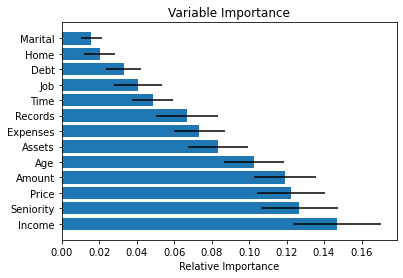

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_standar,y_train)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
nom_cols = data.columns
features = nom_cols #see if it's well organized
print(features[sorted_idx])
padding = np.arange(X_train_standar.size/len(X_train_standar)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

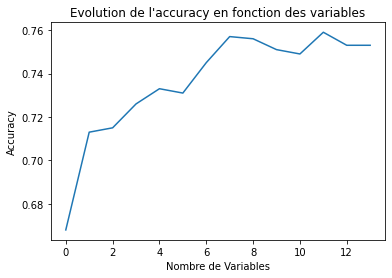

In [43]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(X_train_standar.shape[1]+1)
for f in np.arange(0, X_train_standar.shape[1]+1):
    X1_f = X_train_standar[:,sorted_idx[:f+1]]
    X2_f = X_test_standar[:,sorted_idx[:f+1]]
    KNN.fit(X1_f,y_train)
    YKNN=KNN.predict(X2_f)
    scores[f]=np.round(metrics.accuracy_score(y_test,YKNN),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth':[2,3,4,5],
    'reg_alpha' : [0.3,0.4,0.5,0.6,0.7]
}

clf = GridSearchCV(model, parameters, scoring='roc_auc',cv=1, verbose=True)
clf.fit(X_train, y_train)
scoring = clf.cv_results_
clf.best_params_

Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
import pickle
with open('pipeline.pickle', 'wb') as handle:
    pickle.dump(scoring, handle, protocol=pickle.HIGHEST_PROTOCOL)

# or if we can use joblib
#import joblib
#from sklearn.externals import joblib
#joblib.dump(pipeline, 'pipeline.pkl')